In [2]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = "./data", train = True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./root", train=False, 
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck")

100%|██████████| 170M/170M [00:28<00:00, 5.97MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


100%|██████████| 170M/170M [00:20<00:00, 8.35MB/s] 


Extracting ./root\cifar-10-python.tar.gz to ./root


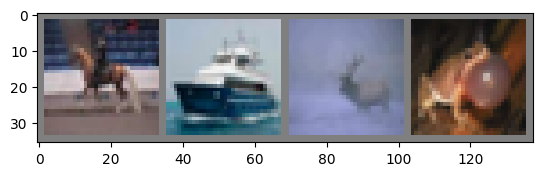

horse ship  deer  frog 


In [6]:
import matplotlib.pyplot as plt

# Functions to show an image

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print lables
print(' '.join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [7]:
images.shape

torch.Size([4, 3, 32, 32])

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # [None, 6, 14, 14]
        x = self.pool(F.relu(self.conv2(x))) # [None, 16, 5, 5]
        x = torch.flatten(x, 1) # [None, 16 * 5 * 5]
        x = F.relu(self.fc1(x)) # [None, 120]
        x = F.relu(self.fc2(x)) # [None, 84]
        x = F.relu(self.fc3(x)) # [None, 10]
        return x
    
net = Net()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9)

In [38]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.304
Finished Training


In [17]:
PATH = "./cifat_net.pth"
torch.save(net.state_dict(), PATH)

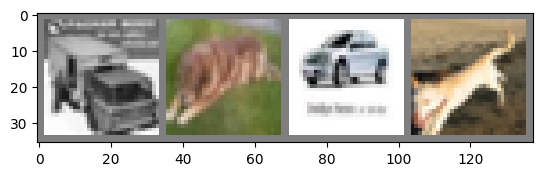

GroundTruth:  truck dog   car   dog  


In [21]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [43]:
net = Net()

In [53]:
outputs = net(images)

In [56]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  frog  truck frog  frog 


In [57]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 & correct // total}%")

Accuracy of the network on the 10000 test images: 0%


In [58]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] +=1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class {classname:5s} is {accuracy:.1f} %")

Accuracy for class plane is 0.0 %
Accuracy for class car   is 0.0 %
Accuracy for class bird  is 0.0 %
Accuracy for class cat   is 0.0 %
Accuracy for class deer  is 0.0 %
Accuracy for class dog   is 0.0 %
Accuracy for class frog  is 94.9 %
Accuracy for class horse is 0.0 %
Accuracy for class ship  is 0.0 %
Accuracy for class truck is 3.8 %


In [59]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [60]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)